In [ ]:
print("contoh")

contoh


In [ ]:

from google.colab import files

uploaded = files.upload()

for fname, filebytes in uploaded.items():
    with open(fname, 'wb') as f:
        f.write(filebytes)
    print(f"sukses: {fname}")

K-Nearest Neighbors

Apa itu K- Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) adalah salah satu algoritma supervised learning yang digunakan untuk klasifikasi dan regresi. Algoritma ini bekerja dengan cara:

1. Menghitung jarak antara data baru yang ingin diprediksi dengan data-data dalam dataset (biasanya menggunakan jarak Euclidean/Euclidean Distance).

2. Menentukan sejumlah k data terdekat (k-nearest neighbors) dari data baru tersebut.

3. Untuk klasifikasi, algoritma akan memberikan label kelas berdasarkan mayoritas label dari tetangga terdekat tersebut. Untuk regresi, nilai prediksi diambil dari rata-rata nilai tetangganya.

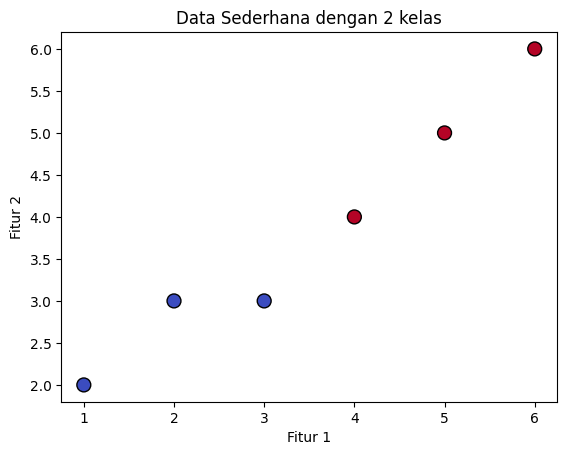

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = np.array([[1,2], [2,3], [3,3], [4,4], [5,5], [6,6]])
y = np.array([0,0,0,1,1,1])

plt.scatter(x[:,0], x[:,1], c=y, cmap='coolwarm', s=100, edgecolor='k')
plt.title('Data Sederhana dengan 2 kelas')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

Optimal Fitting / Generalization yang baik:
 Jika akurasi model pada data training/latih dan data
testing/ujl cukup konsisten dan tidak terlalu berbeda,iin adalah indikator bahwa model mampu mengeneralisasl dengan baik.

Overfitting: Jika akurasi data training sangat tingg1 (misalnya >95%), tetapi akurasi data testing jauh lebih rendah (misalnya < 70%), ini adalah tanda bahwa model mengalami overfitting. Model "Menghafal"data training tetapi tidak mampu memprediksi dengan baik pada data baru.

Underfitting: Jika akurasi data training dan data testing sama-sama rendah (misalnya keduanya < 60%),model mengalami underfitting, yang berarti model
terlalu sederhana dan tidak mampu menangkap pola dalam data

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)

print("Ukuran data latih:", x_train.shape)
print("Ukuran data uji:", x_test.shape)

Ukuran data latih: (120, 2)
Ukuran data uji: (30, 2)


Generalization

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=5)
knn_optimal.fit(x_train, y_train)

akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))

print(f"Good Generalization (k = 5) Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"Good Generalization (k = 5) Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good Generalization (k = 5) Training Accuracy: 81.67%
Good Generalization (k = 5) Testing Accuracy: 86.67%


overfitting

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=4)
knn_optimal.fit(x_train, y_train)

akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))

print(f"Good overfitting (k = 5) Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"Good overfitting (k = 5) Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good overfitting (k = 5) Training Accuracy: 82.50%
Good overfitting (k = 5) Testing Accuracy: 73.33%


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_optimal = KNeighborsClassifier(n_neighbors=120)
knn_optimal.fit(x_train, y_train)

akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))

print(f"Good underfitting (k = 5) Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"Good underfitting (k = 5) Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

Good underfitting (k = 5) Training Accuracy: 36.67%
Good underfitting (k = 5) Testing Accuracy: 20.00%


Tugas pertemuan 3

Gunakan data sklearn untuk Breast Cancer menggunakan KNN Classifier (ambil 2 fitur pertama saja), gunakan n_neighbors dengan mengambil jumlah 2 angka dari belakang NIM mahasiswa masing-masing (Misal 1.221195, maka n_neighbors=95)

Buat visualisasi decision boundaries dan sebutkan apakah hasil akurasinya good generalization, overfitting, atau underfitting

In [ ]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
x = data.data[:, :2]
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

knn_optimal = KNeighborsClassifier(n_neighbors=76) #selain 95
knn_optimal.fit(x_train, y_train)

akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))

print(f"(k = 95) Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"(k = 95) Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

(k = 95) Training Accuracy: 90.77%
(k = 95) Testing Accuracy: 83.33%


(k = 94) Training Accuracy: 89.67%
(k = 94) Testing Accuracy: 83.33%


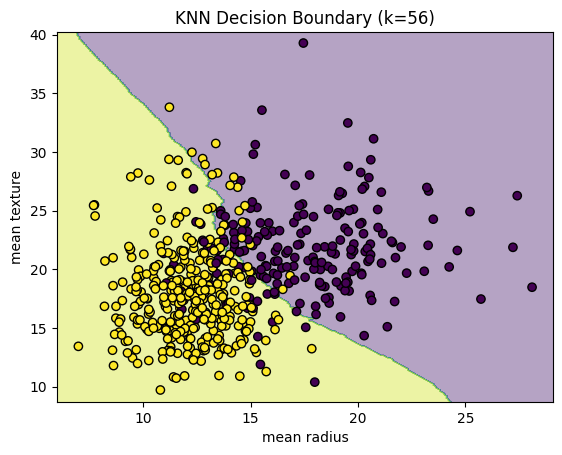

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
x = data.data[:, :2]
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

knn_optimal = KNeighborsClassifier(n_neighbors=94)
knn_optimal.fit(x_train, y_train)

akurasi_optimal_train = accuracy_score(y_train, knn_optimal.predict(x_train))
akurasi_optimal_test = accuracy_score(y_test, knn_optimal.predict(x_test))

print(f"(k = 94) Training Accuracy: {akurasi_optimal_train * 100:.2f}%")
print(f"(k = 94) Testing Accuracy: {akurasi_optimal_test * 100:.2f}%")

# visualisasi

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_optimal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"KNN Decision Boundary (k=56)")
plt.show()